# Heart Attack Classification

## Important Labraies

In [1]:
import numpy as np#for deals with array etc
import pandas as pd#importing dataset
import seaborn as sn
import matplotlib.pyplot as plt#visulization
from sklearn.tree import DecisionTreeClassifier#model
from sklearn.model_selection import train_test_split#model
from sklearn.metrics import classification_report#model
from sklearn import metrics#evalution
from sklearn.metrics import auc, roc_curve, roc_auc_score#curve
#from plot_roc_curve import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier#model
from sklearn.linear_model import LogisticRegression#model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns#visulization
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score


### Data Import

In [2]:
data = pd.read_csv('Heart.csv')
data.head()

,AGE,CREATININE,DIABETES OCCURS,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,PLATELETS,SERUM_SODIUM,GENDER,SMOKING/DRUGS,GLUCOSE,HYPERTENSION,SERUM_CREATININE,ANAEMIA,DEATH_OUTCOMES
0,75.0,582,0,20,1,265000.00,130,1,0,148,0,1.9,0,1
1,55.0,7861,0,38,0,263358.03,136,1,0,85,0,1.1,0,1
2,65.0,146,0,20,0,162000.00,129,1,1,183,0,1.3,0,1
3,50.0,111,0,20,0,210000.00,137,1,0,89,0,1.9,1,1
4,65.0,160,1,20,0,327000.00,116,0,0,137,1,2.7,1,1


In [11]:
data.columns

Index(['AGE', 'CREATININE', 'DIABETES OCCURS', 'EJECTION_FRACTION',
       'HIGH_BLOOD_PRESSURE', 'PLATELETS', 'SERUM_SODIUM', 'GENDER',
       'SMOKING/DRUGS', 'GLUCOSE', 'HYPERTENSION', 'SERUM_CREATININE',
       'ANAEMIA', 'DEATH_OUTCOMES'],
      dtype='object')

In [4]:
data= data.rename(columns=str.lower)

In [7]:
data.columns

Index(['age', 'creatinine', 'diabetes occurs', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_sodium', 'gender',
       'smoking/drugs', 'glucose', 'hypertension', 'serum_creatinine',
       'anaemia', 'death_outcomes'],
      dtype='object')

### Data Explanation

Diabates Occures(0=no,1=yes)
Blood Pressure(1=High,0=low)
Gender(female=0,male=1)
Drugs(0=no,1=yes)
Death(1=die,0=alive)

In [4]:
print(data.shape)#shape
print(data.dtypes)#data types
print(data.isnull().sum())#null values

(291, 14)
AGE                    float64
CREATININE               int64
DIABETES OCCURS          int64
EJECTION_FRACTION        int64
HIGH_BLOOD_PRESSURE      int64
PLATELETS              float64
SERUM_SODIUM             int64
GENDER                   int64
SMOKING/DRUGS            int64
DEATH_OUTCOMES           int64
GLUCOSE                  int64
HYPERTENSION             int64
SERUM_CREATININE       float64
ANAEMIA                  int64
dtype: object
AGE                    0
CREATININE             0
DIABETES OCCURS        0
EJECTION_FRACTION      0
HIGH_BLOOD_PRESSURE    0
PLATELETS              0
SERUM_SODIUM           0
GENDER                 0
SMOKING/DRUGS          0
DEATH_OUTCOMES         0
GLUCOSE                0
HYPERTENSION           0
SERUM_CREATININE       0
ANAEMIA                0
dtype: int64


In [38]:
data.isnull().sum()

age                    0
creatinine             0
diabetes occurs        0
ejection_fraction      0
high_blood_pressure    0
platelets              0
serum_sodium           0
gender                 0
smoking/drugs          0
glucose                0
hypertension           0
serum_creatinine       0
anaemia                0
death_outcomes         0
dtype: int64

In [8]:
data.describe()

,age,creatinine,diabetes occurs,ejection_fraction,high_blood_pressure,platelets,serum_sodium,gender,smoking/drugs,glucose,hypertension,serum_creatinine,anaemia,death_outcomes
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,61.021766,573.219931,0.415808,38.006873,0.357388,262364.435567,136.563574,0.646048,0.312715,120.859107,0.243986,1.399897,0.439863,0.329897
std,11.950340,969.518818,0.493710,11.917820,0.480056,93562.924935,4.442574,0.479018,0.464398,32.374491,0.430224,1.047154,0.497225,0.470985
min,40.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,113.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
25%,51.000000,116.500000,0.000000,30.000000,0.000000,215000.000000,134.000000,0.000000,0.000000,100.000000,0.000000,0.900000,0.000000,0.000000
50%,60.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,137.000000,1.000000,0.000000,114.000000,0.000000,1.100000,0.000000,0.000000
75%,70.000000,582.000000,1.000000,45.000000,1.000000,302500.000000,140.000000,1.000000,1.000000,142.000000,0.000000,1.400000,1.000000,1.000000
max,95.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,148.000000,1.000000,1.000000,197.000000,1.000000,9.400000,1.000000,1.000000


Data have no null values and have only int and float type data 

In [13]:
cor = data.corr()
print (cor)

                          age  creatinine  diabetes occurs  ejection_fraction  \
age                  1.000000   -0.067476        -0.104208           0.071399   
creatinine          -0.067476    1.000000        -0.003030          -0.054573   
diabetes occurs     -0.104208   -0.003030         1.000000          -0.010450   
ejection_fraction    0.071399   -0.054573        -0.010450           1.000000   
high_blood_pressure  0.082590   -0.061804        -0.018099           0.029705   
platelets           -0.030091    0.006303         0.077876           0.039592   
serum_sodium        -0.039462    0.055556        -0.096204           0.176946   
gender               0.065403    0.095482        -0.162893          -0.142726   
smoking/drugs        0.028594    0.008103        -0.163008          -0.067055   
glucose              0.017510   -0.091899        -0.081323           0.056539   
hypertension        -0.005061    0.086824         0.056458          -0.097172   
serum_creatinine     0.15793

In [5]:
data['DEATH_OUTCOMES'].value_counts() # Get the value_counts for Heart Diseases class and not Heart Diseases 

0    195
1     96
Name: DEATH_OUTCOMES, dtype: int64

# Visulization of Data Isights

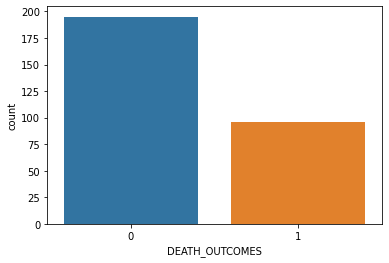

In [5]:
sns.countplot(x='DEATH_OUTCOMES', data=data);

now of alive person is greater than die

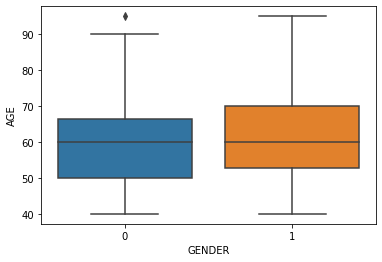

In [6]:
fig = sns.boxplot(y='AGE', x='GENDER', data=data);

Min Age in both Male and female is 40 year and max is 90 plus

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


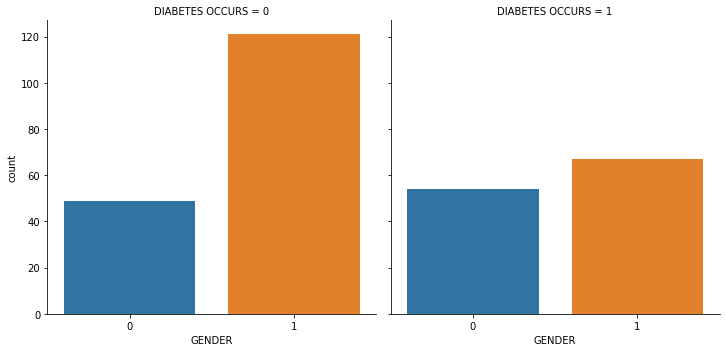

In [7]:
sns.factorplot(x='GENDER', col='DIABETES OCCURS', data=data, kind='count');

This show relation between Diabetes and Gender

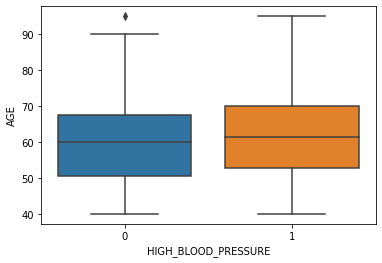

In [8]:
sns.boxplot(y='AGE', x='HIGH_BLOOD_PRESSURE', data=data);

##### show that most of high blood pressure rate is betwwen 60-65 age group people

### Pair Plot

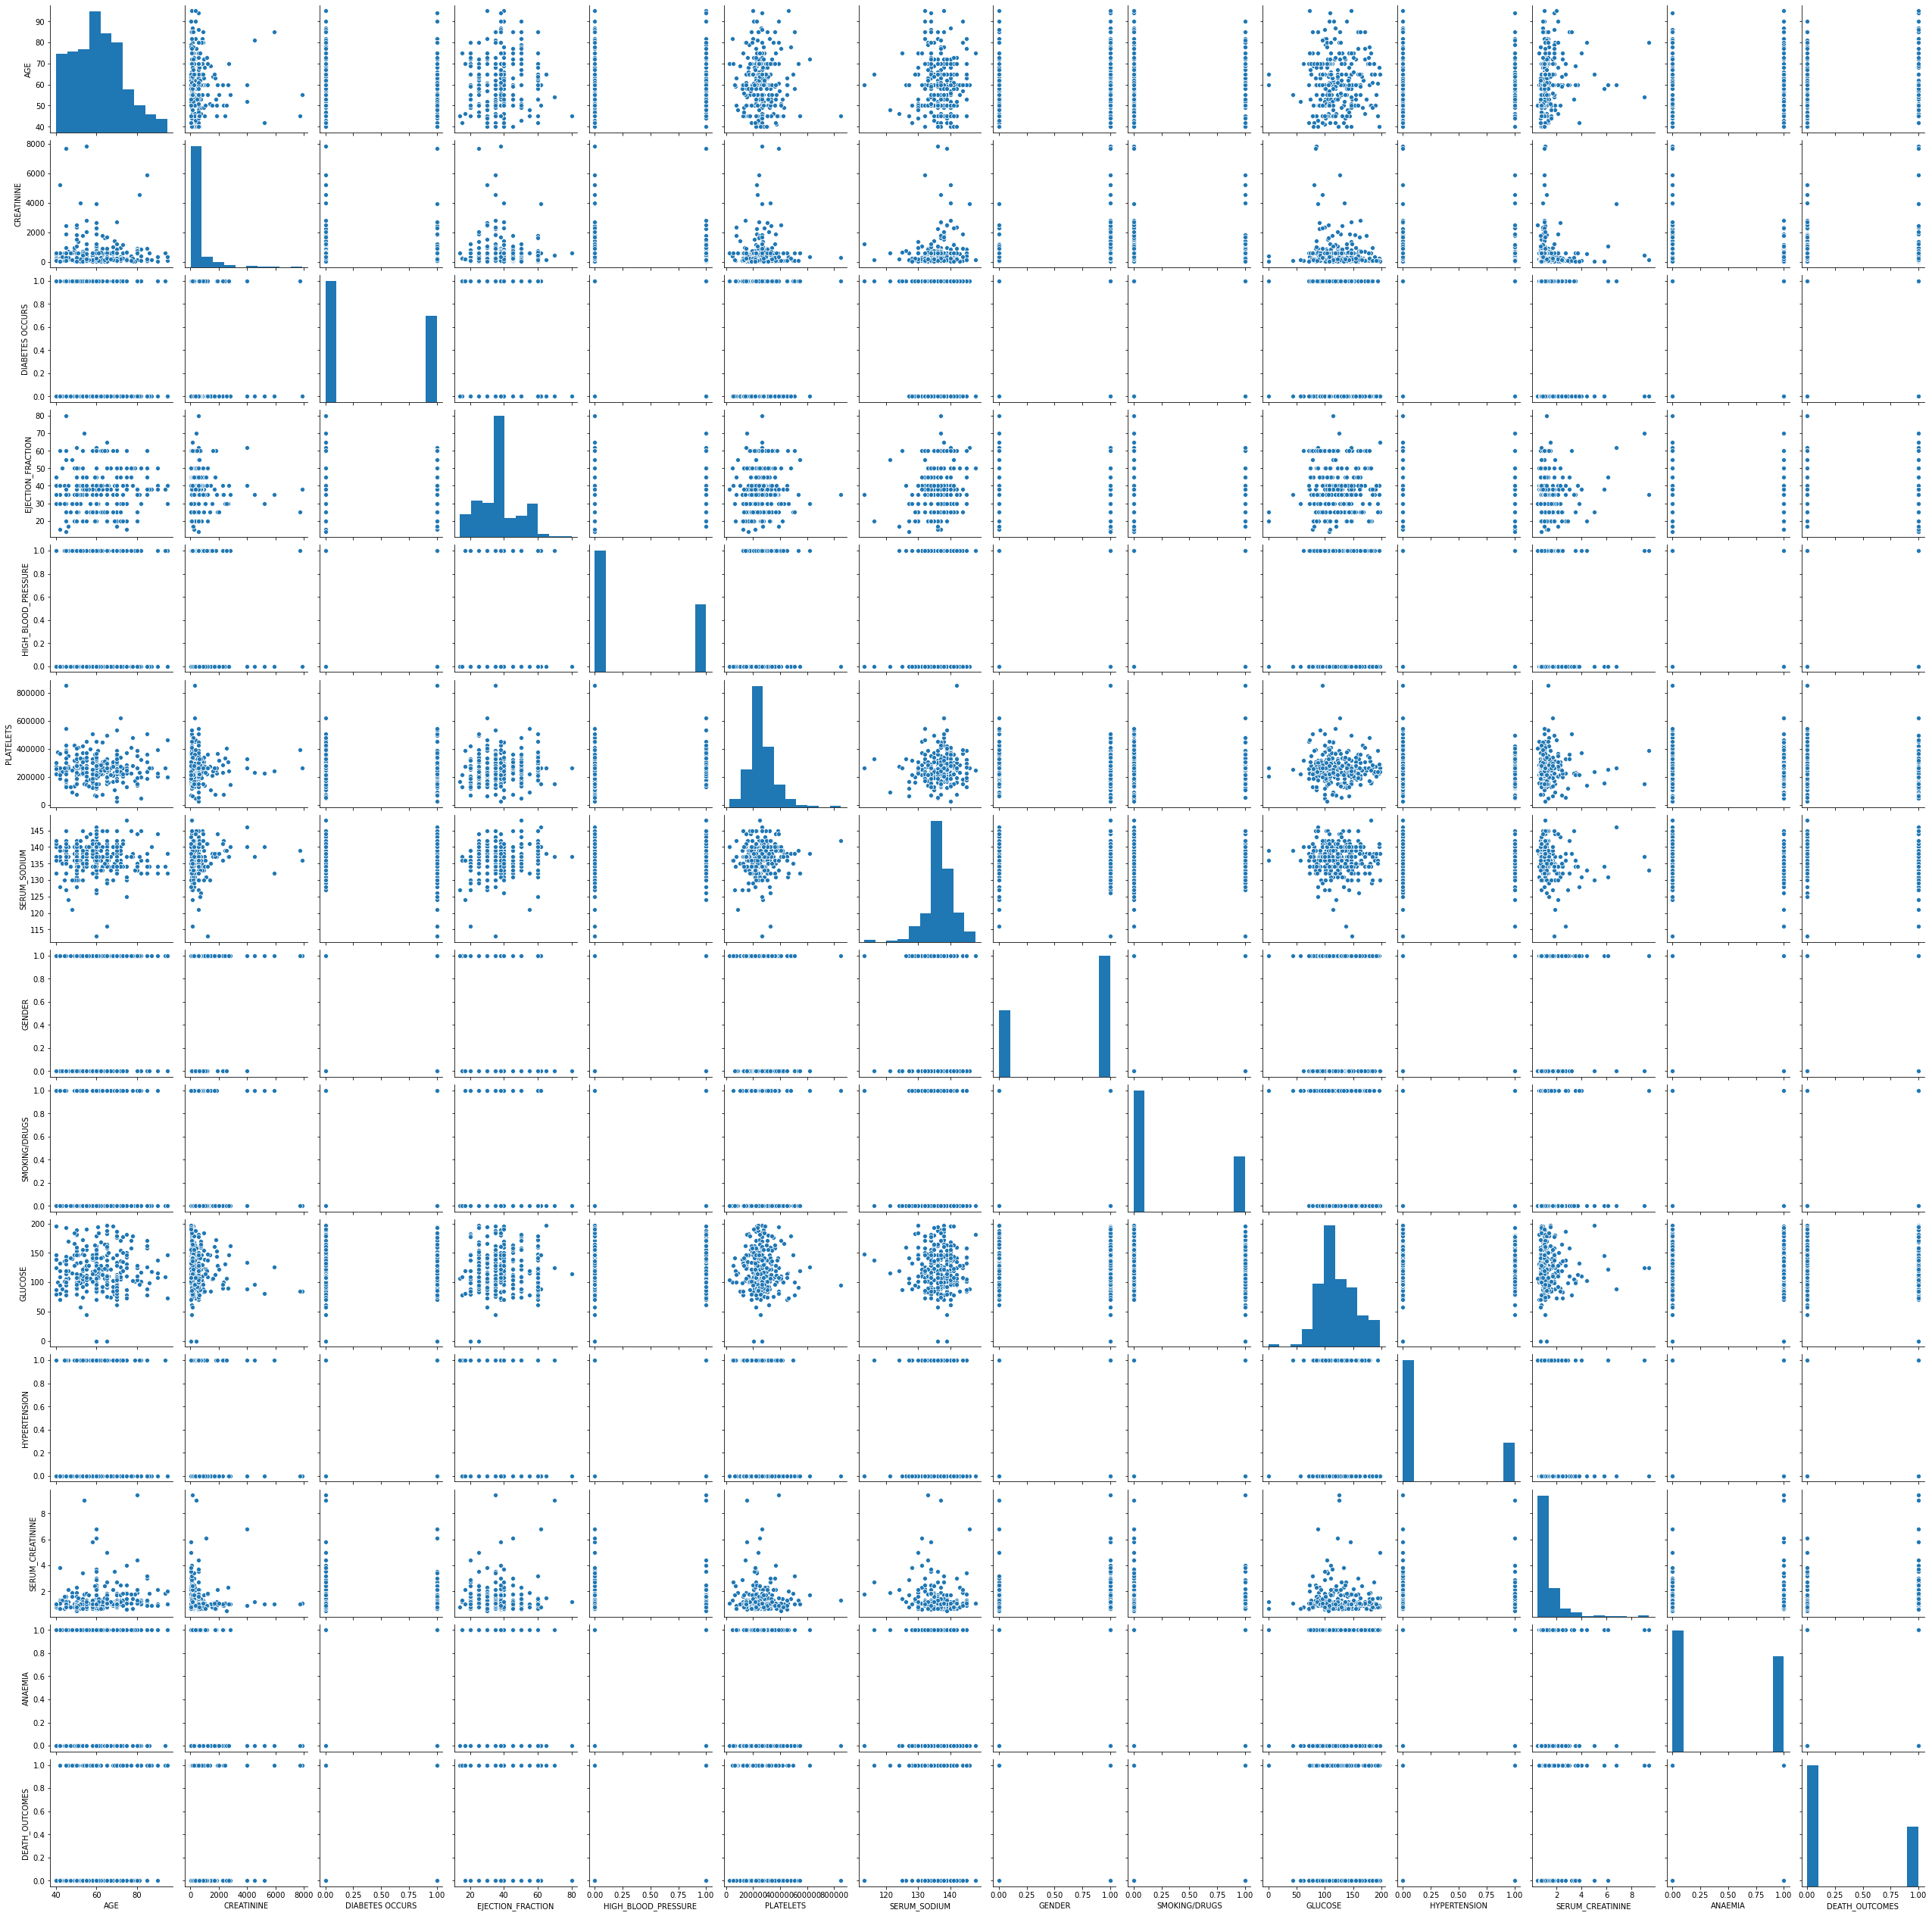

In [64]:
sn.pairplot(data=data)

### Dividing data into two classes 1. with heart disease(WHD) 2. Heart Disease(HD)

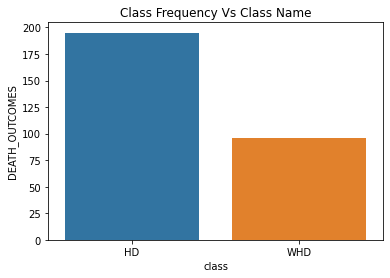

In [6]:
class_dist_df = pd.DataFrame(data['DEATH_OUTCOMES'].value_counts()).reset_index(drop=True)# Reseting the index and get the counts for each class 
class_dist_df['class']= ['HD','WHD'] # HD Means Heart diseases and WHD means NO diseases
sns.barplot(y = 'DEATH_OUTCOMES', x = class_dist_df['class'], data=class_dist_df) # Plotting Class frequency vs Class
plt.title('Class Frequency Vs Class Name')
plt.show()

# Data anlaysis and Feature Selection

####     Creating two dataframes

In [9]:
DF_HD = data[data['DEATH_OUTCOMES']==1] # Dataframe of Heart diseases
DF_WHD = data[data['DEATH_OUTCOMES']==0] # Dataframe of Without Heart diseases

In [10]:
# creating coulmns for both dataframes
DF_HD.columns = ['AGE', 'CREATININE', 'DIABETES OCCURS', 'EJECTION_FRACTION',
       'HIGH_BLOOD_PRESSURE', 'PLATELETS', 'SERUM_SODIUM', 'GENDER',
       'SMOKING/DRUGS', 'GLUCOSE', 'HYPERTENSION', 'SERUM_CREATININE',
       'ANAEMIA', 'DEATH_OUTCOMES']
DF_WHD.columns = ['AGE', 'CREATININE', 'DIABETES OCCURS', 'EJECTION_FRACTION',
       'HIGH_BLOOD_PRESSURE', 'PLATELETS', 'SERUM_SODIUM', 'GENDER',
       'SMOKING/DRUGS', 'GLUCOSE', 'HYPERTENSION', 'SERUM_CREATININE',
       'ANAEMIA', 'DEATH_OUTCOMES']

In [11]:
DF_WHD['AGE'].describe() #This will output the basic statsitics of age in population

count    195.000000
mean      58.957267
std       10.722946
min       40.000000
25%       50.000000
50%       60.000000
75%       65.000000
max       90.000000
Name: AGE, dtype: float64

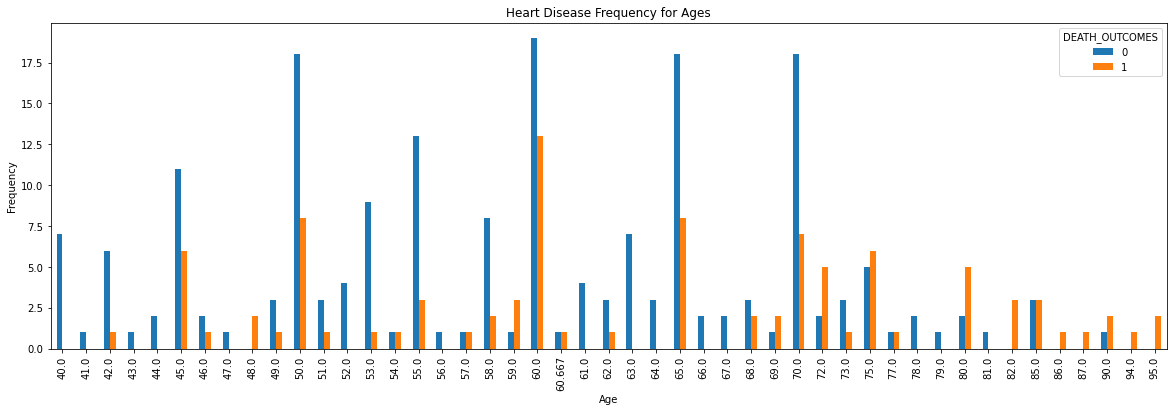

In [13]:
# Hist of Age
DF =DF_HD.append(DF_WHD) 
pd.crosstab(DF['AGE'],DF['DEATH_OUTCOMES']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

#### After analysis histrogram with age we can say that Heart diseases is higher at the age of 60.overall with age we are not able say anything about Heart diseases

In [15]:
print ('Male count with the heart dieases ='), DF_HD[DF_HD['GENDER']==1]['GENDER'].value_counts() # 1 means Male in Sex Column

Male count with the heart dieases =


(None,
 1    62
 Name: GENDER, dtype: int64)

In [16]:
print ('Male count without the heart dieases ='), DF_WHD[DF_WHD['GENDER']==1]['GENDER'].count() # 0 means Female in Sex column

Male count without the heart dieases =


(None, 126)

In [17]:
print ('Female count with the heart dieases ='), len(DF_HD[DF_HD['GENDER']==0]['GENDER'])

Female count with the heart dieases =


(None, 34)

In [18]:
print ('Female count without the heart dieases ='), len(DF_WHD[DF_WHD['GENDER']==0]['GENDER'])

Female count without the heart dieases =


(None, 69)

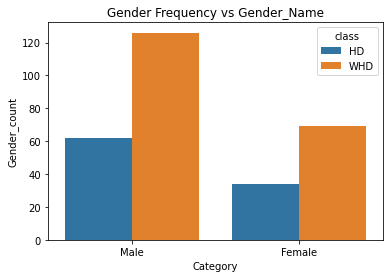

In [19]:
Gender_HD = pd.DataFrame(DF_HD['GENDER'].value_counts()).reset_index() # Value counts for sex with Heart diseases
Gender_WHD = pd.DataFrame(DF_WHD['GENDER'].value_counts()).reset_index() # Value counts for sex with withot Heart diseases
Gender_HD['class'] = "HD"
Gender_WHD['class'] = "WHD"
Gender_HD['index'] =['Male','Female']
Gender_WHD['index'] =['Male','Female']
Gender_DF = Gender_HD.append(Gender_WHD)
Gender_DF.columns = ['Category','Gender_count','class']
sns.barplot(y='Gender_count', x='Category', data=Gender_DF, hue='class')
plt.title('Gender Frequency vs Gender_Name')
plt.show()

#### Male population are more tend to Heart dieases in the population

#### Combine 2 Features gender and male

In [20]:
print ('male age with heart dieases ='), DF_HD[DF_HD['GENDER']==1]['AGE'].describe()
print ('male age without heart dieases ='), DF_WHD[DF_WHD['GENDER']==1]['AGE'].describe()
print ('Female age without heart dieases ='), DF_WHD[DF_WHD['GENDER']==0]['AGE'].describe()
print ('Female age without heart dieases ='), DF_HD[DF_HD['GENDER']==0]['AGE'].describe()

male age with heart dieases =
male age without heart dieases =
Female age without heart dieases =
Female age without heart dieases =


(None,
 count    34.000000
 mean     62.176471
 std      12.327527
 min      42.000000
 25%      50.750000
 50%      60.000000
 75%      70.000000
 max      95.000000
 Name: AGE, dtype: float64)

#### Creatinine  Analysis

In [21]:
DF_HD['CREATININE'].value_counts() # Get value counts for with heart disease class 

582     17
47       2
129      2
60       2
168      2
        ..
94       1
789      1
2017     1
99       1
128      1
Name: CREATININE, Length: 76, dtype: int64

In [22]:
DF_WHD['DIABETES OCCURS'].value_counts() # Get value counts for without heart disease class 

0    114
1     81
Name: DIABETES OCCURS, dtype: int64

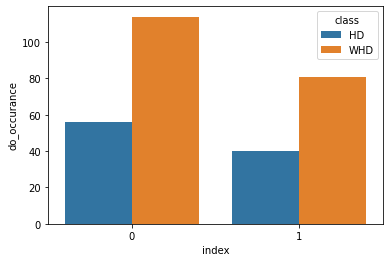

In [23]:
do_dist_df = pd.DataFrame(DF_HD['DIABETES OCCURS'].value_counts()).reset_index() # Value counts for CP with Heart diseases
do_dist_Wdf = pd.DataFrame(DF_WHD['DIABETES OCCURS'].value_counts()).reset_index()# Value counts for CP without Heart diseases
do_dist_df['class'] = "HD"
do_dist_Wdf['class'] = "WHD"
do_dist_df_copy = do_dist_df.copy()
do_dist_df_copy = do_dist_df_copy.append(do_dist_Wdf)
do_dist_df_copy.columns = [u'index', u'do_occurance', u'class']
sns.barplot(y='do_occurance', x='index', data=do_dist_df_copy, hue='class')
plt.show()

#### 0 mean no diabeste occurance
#### 1 mean  presence of diabeste occurance

## The High Blood Pressure Analysis

In [24]:
DF_HD['HIGH_BLOOD_PRESSURE'].describe() # Basic statsitics for trestbps for Heart Diseases cases

count    96.00000
mean      0.40625
std       0.49371
min       0.00000
25%       0.00000
50%       0.00000
75%       1.00000
max       1.00000
Name: HIGH_BLOOD_PRESSURE, dtype: float64

In [25]:
DF_WHD['HIGH_BLOOD_PRESSURE'].describe() # Basic statsitics for trestbps for without Heart Diseases cases

count    195.000000
mean       0.333333
std        0.472618
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: HIGH_BLOOD_PRESSURE, dtype: float64

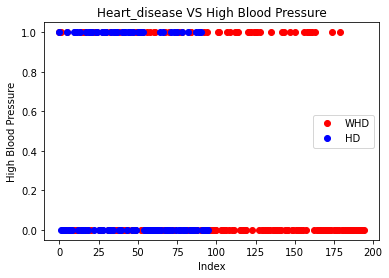

In [26]:
plt.plot(DF[DF['DEATH_OUTCOMES']==0]['HIGH_BLOOD_PRESSURE'].values,'ro',label='WHD') # Heart Diseases cases vs Blood Pressure
plt.plot(DF[DF['DEATH_OUTCOMES']!=0]['HIGH_BLOOD_PRESSURE'].values,'bo',label='HD') # Without Heart Diseases cases vs Blood Pressure
plt.xlabel('Index')
plt.ylabel('High Blood Pressure')
plt.title('Heart_disease VS High Blood Pressure')
plt.legend()
plt.show()

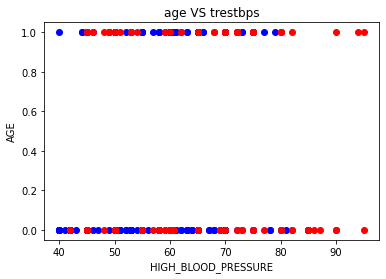

In [27]:
# Plot between age vs High blood Pressure
plt.plot(DF_WHD['AGE'],DF_WHD['HIGH_BLOOD_PRESSURE'],'bo')
plt.plot(DF_HD['AGE'],DF_HD['HIGH_BLOOD_PRESSURE'],'ro')
plt.title('age VS trestbps')
plt.ylabel('AGE')
plt.xlabel('HIGH_BLOOD_PRESSURE')
plt.show()

#### No descision Boundary to classify between of heart disease and Not a heart disease with help of high blood pressure

## Serum Sodium Analysis

In [28]:
DF_HD['SERUM_SODIUM'].describe()# Basic statsitics for sodium for Heart Diseases cases

count     96.000000
mean     135.375000
std        5.001579
min      116.000000
25%      133.000000
50%      135.500000
75%      138.250000
max      146.000000
Name: SERUM_SODIUM, dtype: float64

In [29]:
DF_WHD['SERUM_SODIUM'].describe() # Basic statsitics for sodium for without Heart Diseases cases

count    195.000000
mean     137.148718
std        4.026131
min      113.000000
25%      135.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: SERUM_SODIUM, dtype: float64

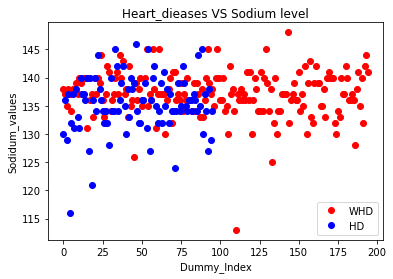

In [30]:
# Plot of target variable with sodium level
plt.plot(DF[DF['DEATH_OUTCOMES']==0]['SERUM_SODIUM'].values,'ro',label='WHD')
plt.plot(DF[DF['DEATH_OUTCOMES']!=0]['SERUM_SODIUM'].values,'bo',label='HD')
plt.xlabel('Dummy_Index')
plt.ylabel('Sodidum_values')
plt.title('Heart_dieases VS Sodium level')
plt.legend()
plt.show()

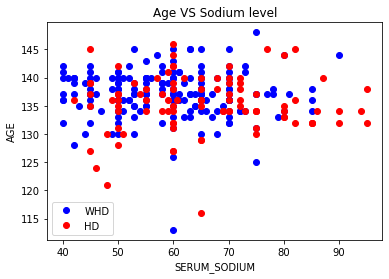

In [31]:
# Plot of age value with sodium level
plt.plot(DF_WHD['AGE'],DF_WHD['SERUM_SODIUM'],'bo',label='WHD')
plt.plot(DF_HD['AGE'],DF_HD['SERUM_SODIUM'],'ro',label='HD')
plt.title('Age VS Sodium level')
plt.ylabel('AGE')
plt.xlabel('SERUM_SODIUM')
plt.legend()
plt.show()

####  No descision Boundary to classify between of heart disease and Not a heart disease with help of sodium level in blood

## Consumption of Smoking/Drugs Analysis

In [32]:
DF_HD['SMOKING/DRUGS'].value_counts() # Value counts for categorical data SMOKING/DRUGS for heart disease

0    66
1    30
Name: SMOKING/DRUGS, dtype: int64

In [33]:
DF_WHD['SMOKING/DRUGS'].value_counts() # Value counts for categorical data SMOKING/DRUGS for without heart disease

0    134
1     61
Name: SMOKING/DRUGS, dtype: int64

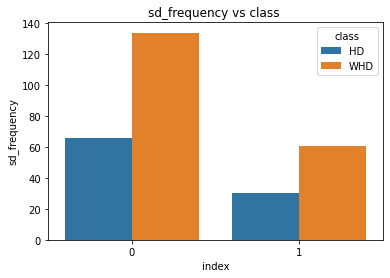

In [34]:
sd_dist_df = pd.DataFrame(DF_HD['SMOKING/DRUGS'].value_counts()).reset_index()
sd_dist_Wdf = pd.DataFrame(DF_WHD['SMOKING/DRUGS'].value_counts()).reset_index()
sd_dist_df['class'] = "HD"
sd_dist_Wdf['class'] = "WHD"
sd_dist_df_copy = sd_dist_df.copy()
sd_dist_df_copy = sd_dist_df_copy.append(sd_dist_Wdf)
sd_dist_df_copy.columns = [u'index', u'sd_frequency', u'class']
sns.barplot(y='sd_frequency', x='index', data=sd_dist_df_copy, hue='class')
plt.title('sd_frequency vs class ')
plt.show()

####  Less probability of heart disease with consumption of smoking  or drugs

## Hypertension Analysis

In [35]:
DF_HD['HYPERTENSION'].value_counts()  # Value counts for categorical data HYPERTENSION for heart disease

0    64
1    32
Name: HYPERTENSION, dtype: int64

In [36]:
DF_WHD['HYPERTENSION'].value_counts() # Value counts for categorical data 'HYPERTENSION' for without heart disease

0    156
1     39
Name: HYPERTENSION, dtype: int64

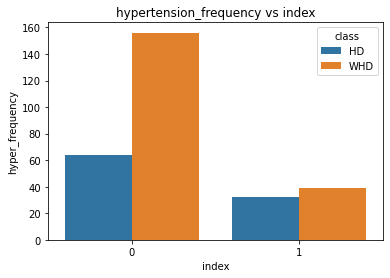

In [37]:
hyper_dist_df = pd.DataFrame(DF_HD['HYPERTENSION'].value_counts()).reset_index() # value counts for restecg for Heart diseases Cases
hyper_dist_Wdf = pd.DataFrame(DF_WHD['HYPERTENSION'].value_counts()).reset_index()# value counts for restecg for without Heart diseases Cases
hyper_dist_df['class'] = "HD"
hyper_dist_Wdf['class'] = "WHD"
hyper_dist_df_copy = hyper_dist_df.copy()
hyper_dist_df_copy = hyper_dist_df_copy.append(hyper_dist_Wdf)
hyper_dist_df_copy.columns = [u'index', u'hyper_frequency', u'class']
sns.barplot(y='hyper_frequency', x='index', data=hyper_dist_df_copy, hue='class')
plt.title('hypertension_frequency vs index')
plt.show()

#### 1.no hypertension has less probability of  heart disease
#### 2 . hypertension has no clear relation with  heart disease

##  Blood Gulocose Analysis

In [38]:
DF_HD['GLUCOSE'].describe() # Basic statstics for GLUCOSE for Heart diseases 

count     96.000000
mean     122.552083
std       35.621363
min        0.000000
25%      101.750000
50%      121.000000
75%      143.500000
max      197.000000
Name: GLUCOSE, dtype: float64

In [39]:
DF_WHD['GLUCOSE'].describe() # Basic statstics for 'GLUCOSE' for without Heart diseases 

count    195.000000
mean     120.025641
std       30.712910
min       44.000000
25%      100.000000
50%      112.000000
75%      142.000000
max      197.000000
Name: GLUCOSE, dtype: float64

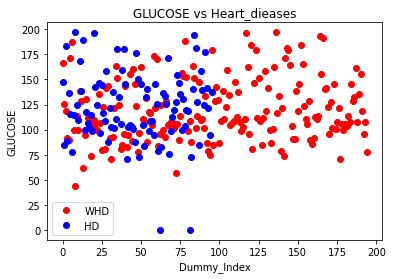

In [40]:
# Plot between target vs thalach
plt.plot(DF[DF['DEATH_OUTCOMES']==0]['GLUCOSE'].values,'ro',label='WHD')
plt.plot(DF[DF['DEATH_OUTCOMES']!=0]['GLUCOSE'].values,'bo',label='HD')
plt.xlabel('Dummy_Index')
plt.ylabel('GLUCOSE')
plt.title('GLUCOSE vs Heart_dieases')
plt.legend()
plt.show()

In [41]:
DF_HD['ANAEMIA'].value_counts() # Value counts for categorical data SMOKING/DRUGS for heart disease

0    50
1    46
Name: ANAEMIA, dtype: int64

In [42]:
DF_WHD['ANAEMIA'].value_counts() # Get value counts for without heart disease class 

0    113
1     82
Name: ANAEMIA, dtype: int64

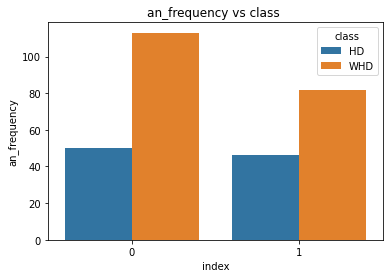

In [43]:
an_dist_df = pd.DataFrame(DF_HD['ANAEMIA'].value_counts()).reset_index()
an_dist_Wdf = pd.DataFrame(DF_WHD['ANAEMIA'].value_counts()).reset_index()
an_dist_df['class'] = "HD"
an_dist_Wdf['class'] = "WHD"
an_dist_df_copy = an_dist_df.copy()
an_dist_df_copy = an_dist_df_copy.append(an_dist_Wdf)
an_dist_df_copy.columns = [u'index', u'an_frequency', u'class']
sns.barplot(y='an_frequency', x='index', data=an_dist_df_copy, hue='class')
plt.title('an_frequency vs class ')
plt.show()

#### No clear relationship between anemia and heartdisease

### Platelets Analysis

In [44]:
DF_HD['PLATELETS'].describe() # Basic statstics for PLATELETS for Heart diseases

count        96.000000
mean     256381.044792
std       98525.682856
min       47000.000000
25%      197500.000000
50%      258500.000000
75%      311000.000000
max      621000.000000
Name: PLATELETS, dtype: float64

In [45]:
DF_WHD['PLATELETS'].describe() # Basic statstics for PLATELETS for without Heart diseases 

count       195.000000
mean     265310.104872
std       91136.656730
min       25100.000000
25%      220000.000000
50%      263000.000000
75%      301500.000000
max      850000.000000
Name: PLATELETS, dtype: float64

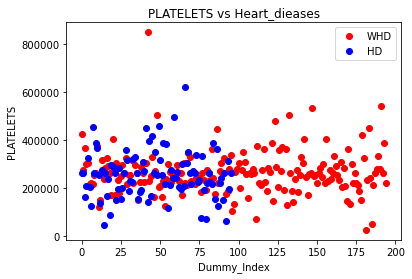

In [46]:
plt.plot(DF[DF['DEATH_OUTCOMES']==0]['PLATELETS'].values,'ro',label='WHD')
plt.plot(DF[DF['DEATH_OUTCOMES']!=0]['PLATELETS'].values,'bo',label='HD')
plt.xlabel('Dummy_Index')
plt.ylabel('PLATELETS')
plt.title('PLATELETS vs Heart_dieases')
plt.legend()
plt.show()

### Serum Creatinine Analysis

In [47]:
DF_HD['SERUM_CREATININE'].describe() # Basic statstics for SERUM_CREATININE for Heart diseases

count    96.000000
mean      1.835833
std       1.468562
min       0.600000
25%       1.075000
50%       1.300000
75%       1.900000
max       9.400000
Name: SERUM_CREATININE, dtype: float64

In [48]:
DF_WHD['SERUM_CREATININE'].describe() # Basic statstics for SERUM_CREATININE for without Heart diseases 

count    195.000000
mean       1.185282
std        0.665360
min        0.500000
25%        0.900000
50%        1.000000
75%        1.200000
max        6.100000
Name: SERUM_CREATININE, dtype: float64

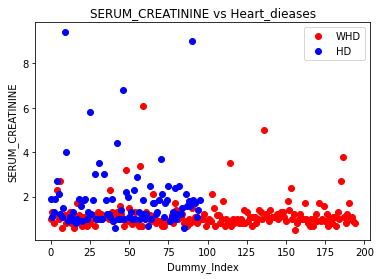

In [49]:
plt.plot(DF[DF['DEATH_OUTCOMES']==0]['SERUM_CREATININE'].values,'ro',label='WHD')
plt.plot(DF[DF['DEATH_OUTCOMES']!=0]['SERUM_CREATININE'].values,'bo',label='HD')
plt.xlabel('Dummy_Index')
plt.ylabel('SERUM_CREATININE')
plt.title('SERUM_CREATININE vs Heart_dieases')
plt.legend()
plt.show()

#### Higher level tends to heart disease

### Ejection Fraction Analysis

In [50]:
DF_HD['EJECTION_FRACTION'].describe() # Basic statstics for EJECTION_FRACTIONfor Heart diseases

count    96.000000
mean     33.468750
std      12.525303
min      14.000000
25%      25.000000
50%      30.000000
75%      38.000000
max      70.000000
Name: EJECTION_FRACTION, dtype: float64

In [51]:
DF_WHD['EJECTION_FRACTION'].describe() # Basic statstics for EJECTION_FRACTION'for without Heart diseases 

count    195.000000
mean      40.241026
std       10.967542
min       17.000000
25%       35.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: EJECTION_FRACTION, dtype: float64

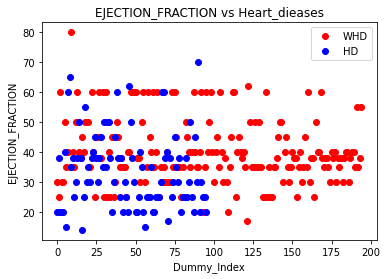

In [52]:
plt.plot(DF[DF['DEATH_OUTCOMES']==0]['EJECTION_FRACTION'].values,'ro',label='WHD')
plt.plot(DF[DF['DEATH_OUTCOMES']!=0]['EJECTION_FRACTION'].values,'bo',label='HD')
plt.xlabel('Dummy_Index')
plt.ylabel('EJECTION_FRACTION')
plt.title('EJECTION_FRACTION vs Heart_dieases')
plt.legend()
plt.show()

### Data Correlation

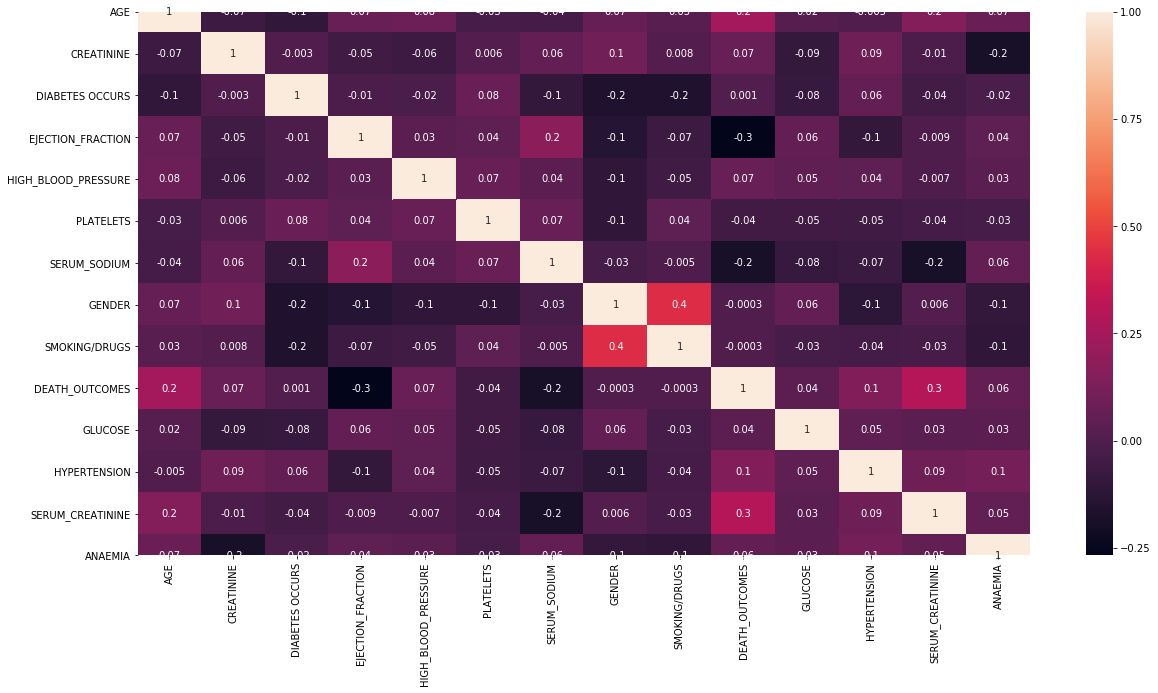

In [9]:
cor = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor, annot=True, fmt='.1g');

this show the co relation between Different Features

# Data Prepration

In [5]:
X = data.drop(['death_outcomes'], axis=1)#drop predictor
Y = data['death_outcomes']#only predictor

# Machine Learning Part

In [6]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=45) #test25% and train 75%

### Decision Tree

In [7]:
##Call Model
clf = DecisionTreeClassifier(criterion="gini", max_depth=4,random_state=45)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [8]:
dt_acc=(metrics.accuracy_score(y_test, y_pred))
dt_acc

0.7945205479452054

# Cross Validation

In [9]:
scores_dt = cross_val_score(clf, X_train, y_train, cv=5)
scores_dt

array([0.54545455, 0.84090909, 0.59090909, 0.58139535, 0.74418605])

In [10]:
scores_dt.mean()

0.6605708245243129

now try different parameters in Decision tress

In [11]:
#Call Model
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=100)
clf = clf.fit(X_train,y_train)
dt_pred = clf.predict(X_test)
dt_pred_prb = clf.predict_proba(X_test)[:, 1]

In [12]:
dt_tune_acc=(metrics.accuracy_score(y_test, dt_pred))
dt_tune_acc

0.7534246575342466

In [13]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        52
           1       0.62      0.38      0.47        21

    accuracy                           0.75        73
   macro avg       0.70      0.64      0.65        73
weighted avg       0.74      0.75      0.73        73



### ROC Curve

In [14]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

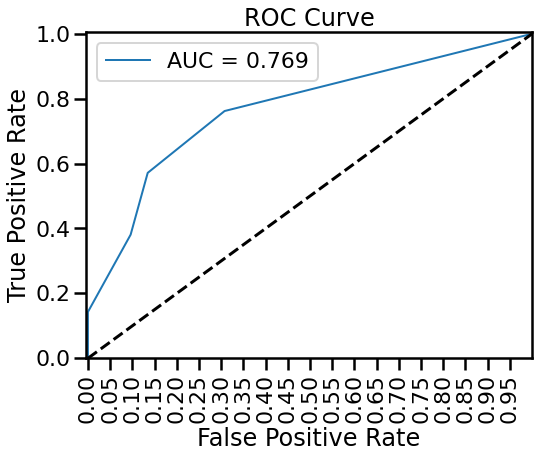

In [15]:
sns.set_context('poster')
auc_dt = roc_auc_score(y_test, dt_pred_prb)
fpr, tpr, threshold = roc_curve(y_test, dt_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_dt)

# SVM

In [16]:
svm = SVC()
svm = svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [17]:
svm_acc=(metrics.accuracy_score(y_test, svm_pred))
svm_acc

0.7123287671232876

# KNN Classifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
KNN_acc=knn.score(X_test, y_test)
KNN_acc

0.6712328767123288

### Random Forest

In [19]:
clf_rf = RandomForestClassifier(criterion='entropy',random_state=45)

In [20]:
clf_rf.fit(X_train, y_train)
rf_pred= clf_rf.predict(X_test)

In [21]:
rf_acc=(metrics.accuracy_score(y_test, rf_pred))
rf_acc

0.7808219178082192

In [22]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        52
           1       0.67      0.48      0.56        21

    accuracy                           0.78        73
   macro avg       0.74      0.69      0.71        73
weighted avg       0.77      0.78      0.77        73



### Logistic Regression

In [23]:
lr_model = LogisticRegression(random_state=45)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [34]:
lr_acc=(metrics.accuracy_score(y_test, lr_pred))
lr_acc

0.7123287671232876

In [35]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        52
           1       0.50      0.33      0.40        21

    accuracy                           0.71        73
   macro avg       0.63      0.60      0.61        73
weighted avg       0.69      0.71      0.69        73



# Algo_comparison/Results

In [36]:
Algo_comparison={"Algorithms":["Logistic Reg","Random Forest","Decision Tree","Tune Decision Tree",'SVM','KNN'],
                 "Accuracy":[lr_acc,rf_acc,dt_acc,dt_tune_acc,svm_acc,KNN_acc]               
                }

In [37]:
comparison = pd.DataFrame(Algo_comparison)
comparison.sort_values(['Accuracy'], ascending=False)

,Algorithms,Accuracy
2,Decision Tree,0.794521
1,Random Forest,0.780822
3,Tune Decision Tree,0.753425
0,Logistic Reg,0.712329
4,SVM,0.712329
5,KNN,0.671233


# plot

In [38]:
plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
sns.boxplot(y='Accuracy', x='Algorithms', data=comparison);
plt.show()   

NameError: name 'fig' is not defined

<Figure size 1440x360 with 0 Axes>

In [39]:
roc_auc_score(y_test, dt_pred_prb)

0.7687728937728937

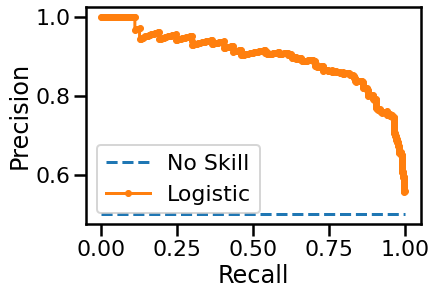

In [42]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(testy, pos_probs)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

for this problem we try different algos like Random forest,Logistic Regression,Decision Tree,and also try by tunning them,to get good results

No Skill PR AUC: 0.007
Logistic PR AUC: 0.228


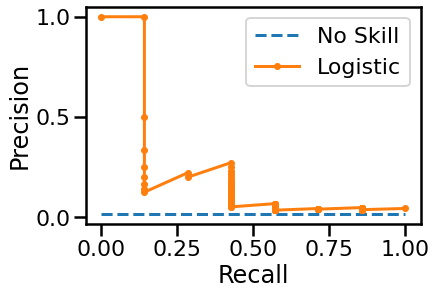

In [43]:

# pr curve and pr auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

# plot no skill and model precision-recall curves
def plot_pr_curve(test_y, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = len(test_y[test_y==1]) / len(test_y)
	# plot the no skill precision-recall curve
	pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(testy, model_probs)
	pyplot.plot(recall, precision, marker='.', label='Logistic')
	# axis labels
	pyplot.xlabel('Recall')
	pyplot.ylabel('Precision')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(testy, model_probs)
# pr curve and pr auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

Decision Tress is the Best choice for this problem if we consider Accuarcy but if we also consider recall and Precision then the result is different

### Logistic Regression Classification Report

In [32]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        52
           1       0.50      0.33      0.40        21

    accuracy                           0.71        73
   macro avg       0.63      0.60      0.61        73
weighted avg       0.69      0.71      0.69        73



### Random Forest Classification Report

In [33]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        52
           1       0.67      0.48      0.56        21

    accuracy                           0.78        73
   macro avg       0.74      0.69      0.71        73
weighted avg       0.77      0.78      0.77        73



### Tune Decision Tree Classification Report

In [34]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        52
           1       0.62      0.38      0.47        21

    accuracy                           0.75        73
   macro avg       0.70      0.64      0.65        73
weighted avg       0.74      0.75      0.73        73



Now For in case of Recall and Precision we chose other alogo in best case

# Conclusion

Decision is totally base on Our Requirement

# Applying feature selection to improve accuracy

## Forming Feature Dataframe

In [17]:
Features = ['age', 'ejection_fraction',
       'high_blood_pressure', 'serum_sodium',
        'creatinine']
      # we will choose only these based on above analysis

In [18]:
data[Features].head(5) # Print the prepared Data

,age,ejection_fraction,high_blood_pressure,serum_sodium,creatinine
0,75.0,20,1,130,582
1,55.0,38,0,136,7861
2,65.0,20,0,129,146
3,50.0,20,0,137,111
4,65.0,20,0,116,160


In [19]:
# This Function will convert categorical data to numerical data and put the data of different category into different column
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def one_hot_coding(Data,column_name):
    thal_value = Data[column_name].tolist()
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(thal_value)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    new_df = pd.DataFrame(onehot_encoded)
    new_df = rename_column(new_df,column_name)
    return new_df

In [20]:
# This function rename the columns created by above column 
def rename_column(new_df,column_name):
    col_list = []
    for i in range(0,len(new_df.columns)):
        col_list.append(column_name+'_'+str(i))
    new_df.columns = col_list
    return new_df

In [33]:
# Loading all the library
import os
import numpy

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import seaborn as sns

%matplotlib inline

In [34]:
# converting the categorical data to numerical data

new_df_ef = one_hot_coding(data,'ejection_fraction')
new_df_bp = data['high_blood_pressure']
new_df_pl = one_hot_coding(data,'age')
new_df_ss = one_hot_coding(data,'serum_sodium') 
new_df_sr = one_hot_coding(data,'creatinine') 


In [35]:
# Merging all the feature Dataframe into single Dataframe
Merged_df = pd.concat([new_df_ef,new_df_bp,new_df_pl,new_df_ss,new_df_sr], axis=1)


In [37]:
# Normalizing the numerical data and bring them in range 0 to 1
Merged_df['ejection_fraction'] = (Merged_df['ejection_fraction'] - np.min(Merged_df['ejection_fraction'])) / (np.max(Merged_df['ejection_fraction']) - np.min(Merged_df['ejection_fraction']))
Merged_df['age'] = (Merged_df['age'] - np.min(Merged_df['age'])) / (np.max(Merged_df['age']) - np.min(Merged_df['age']))
Merged_df['serum_sodium'] = (Merged_df['serum_sodium'] - np.min(Merged_df['serum_sodium'])) / (np.max(Merged_df['serum_sodium']) - np.min(Merged_df['serum_sodium']))
Merged_df['high_blood_pressure'] = (Merged_df['high_blood_pressure'] - np.min(Merged_df['high_blood_pressure'])) / (np.max(Merged_df['high_blood_pressure']) - np.min(Merged_df['high_blood_pressure']))
Merged_df['creatinine'] = (Merged_df['creatinine'] - np.min(Merged_df['creatinine'])) /(np.max(Merged_df['creatinine']) - np.min(Merged_df['creatinine']))

KeyError: 'ejection_fraction'

In [155]:
(Merged_df.columns)

Index(['EJECTION_FRACTION', 'HIGH_BLOOD_PRESSURE_0', 'HIGH_BLOOD_PRESSURE_1',
       'PLATELETS', 'SERUM_SODIUM', 'GENDER_0', 'GENDER_1', 'GLUCOSE',
       'HYPERTENSION_0', 'HYPERTENSION_1', 'SERUM_CREATININE'],
      dtype='object')

In [157]:
# Divide the data into input and Output data 
Merged_df['Output_variable'] = data['DEATH_OUTCOMES']
Input_DF = Merged_df.drop(['Output_variable'],axis =1)

In [158]:
# Divide the data into train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(Input_DF, Merged_df['Output_variable'], test_size=0.20, random_state=42)

## model selection

In [159]:
# Intialization of classifier 
classifiers =[]
model1 = LogisticRegression()
classifiers.append(model1)
model2 = SVC()
classifiers.append(model2)
model3 = DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = AdaBoostClassifier()
classifiers.append(model5)

In [160]:
# List of models 
model_name = ['LogisticRegression','Support Vector Machine','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier']
Training_score ,Testing_score,TP,FP,FN,Precision,Recall,classifiers_list = [],[],[],[],[],[],[],[]

In [163]:
# Running for differnent classifier and Save scores for different classfiers into model
for i in range(0,len(classifiers)):
    clf = classifiers[i]
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    classifiers_list.append(model_name[i])
    Training_score.append(clf.score(X_train,y_train))
    Testing_score.append(clf.score(X_test,y_test))
    TP.append(cm[1][1])
    FP.append(cm[0][1])
    FN.append(cm[1][0])
    Precision.append( precision_score(y_test,y_pred))
    Recall.append(recall_score(y_test,y_pred))
    
Score_DF = pd.DataFrame()
Score_DF['classifiers'] = classifiers_list
Score_DF['Training_score'] = Training_score
Score_DF['Testing_score'] = Testing_score
Score_DF['True_positive'] = TP
Score_DF['False_positive'] = FP
Score_DF['False_negative'] = FN
Score_DF['Precision'] = Precision
Score_DF['Recall'] = Recall
Score_DF

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,classifiers,Training_score,Testing_score,True_positive,False_positive,False_negative,Precision,Recall
0,LogisticRegression,0.745690,0.610169,2,1,22,0.666667,0.083333
1,Support Vector Machine,0.693966,0.593220,0,0,24,0.000000,0.000000
2,DecisionTreeClassifier,1.000000,0.576271,11,12,13,0.478261,0.458333
3,RandomForestClassifier,1.000000,0.644068,9,6,15,0.600000,0.375000
4,AdaBoostClassifier,0.853448,0.610169,11,10,13,0.523810,0.458333


##### Model is overfitting as its giving good accuracy on training data and low accuracy at testing data

In [44]:
# pr curve and pr auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [45]:
# plot no skill and model precision-recall curves
def plot_pr_curve(test_y, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = len(test_y[test_y==1]) / len(test_y)
	# plot the no skill precision-recall curve
	pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(testy, model_probs)
	pyplot.plot(recall, precision, marker='.', label='Logistic')
	# axis labels
	pyplot.xlabel('Recall')
	pyplot.ylabel('Precision')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()

No Skill PR AUC: 0.244
Logistic PR AUC: 0.228


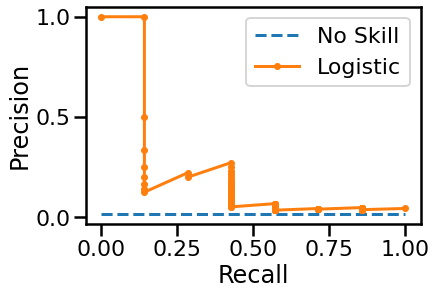

In [46]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(testy, model_probs)